# Help Boost Our Online Reach

In [1]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import nltk

In [2]:
# Storing the given csv files into dataframes.
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [3]:
train_data.head()

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",?,?,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,...,0,34,0,682,126,1,0.531746,0.142857,1,3711
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",?,?,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,...,0,12,0,3008,78,1,0.628205,0.000000,1,7222
2,http://www.musingsofahousewife.com/2011/03/tri...,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",science_technology,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,...,1,17,0,11008,257,5,0.466926,0.062500,1,3964
3,http://www.thelittleteochew.com/2011/07/ikan-b...,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",recreation,0.475039,1.665254,0.419580,0.199301,0.097902,0.066434,0.472649,...,1,28,0,4585,286,5,0.244755,0.085868,1,3697
4,http://recipes.wuzzle.org/index.php/72,"{""url"":""recipes wuzzle org index php 72"",""titl...",computer_internet,0.535009,0.181818,0.036364,0.000000,0.000000,0.000000,0.292614,...,0,3,0,1745,55,1,0.072727,0.115044,1,4321


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5916 entries, 0 to 5915
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         5916 non-null   object 
 1   webpageDescription          5916 non-null   object 
 2   alchemy_category            5916 non-null   object 
 3   alchemy_category_score      5916 non-null   object 
 4   avgLinkWordLength           5916 non-null   float64
 5   AvglinkWithOneCommonWord    5916 non-null   float64
 6   AvglinkWithTwoCommonWord    5916 non-null   float64
 7   AvglinkWithThreeCommonWord  5916 non-null   float64
 8   AvglinkWithFourCommonWord   5916 non-null   float64
 9   redundancyMeasure           5916 non-null   float64
 10  embedRatio                  5916 non-null   float64
 11  framebased                  5916 non-null   int64  
 12  frameTagRatio               5916 non-null   float64
 13  domainLink                  5916 

### Check whether the labels are biased or not 

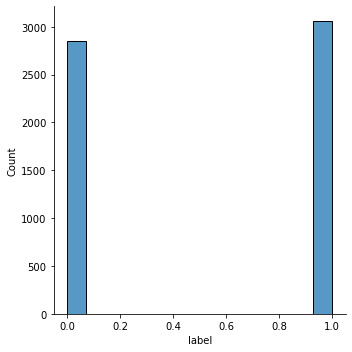

In [5]:
sns.displot(train_data['label'])

#### There are around 48% 0's and 52% 1's. Hence the data is equally distributed

### Extracting title and body as seperate features from webPageDescription feature

In [6]:
# Helper function to seperate title from webPageDescription.
def check_title(x):
    dicti = json.loads(x)
    if 'title' in dicti.keys():
        return json.loads(x)['title']
    else:
        return np.nan

In [7]:
train_data['title'] = train_data['webpageDescription'].apply(lambda x: check_title(x)) 
train_data['body'] = train_data['webpageDescription'].apply(lambda x: json.loads(x)['body']) 

test_data['title'] = test_data['webpageDescription'].apply(lambda x: check_title(x))
test_data['body'] = test_data['webpageDescription'].apply(lambda x: json.loads(x)['body']) 

In [8]:
print('Number of unique values of each feature :')
for i in train_data.columns:
    print(str(i)+": "+str(train_data[i].nunique()))

Number of unique values of each feature :
url: 5916
webpageDescription: 5915
alchemy_category: 14
alchemy_category_score: 3866
avgLinkWordLength: 4688
AvglinkWithOneCommonWord: 3785
AvglinkWithTwoCommonWord: 3438
AvglinkWithThreeCommonWord: 2774
AvglinkWithFourCommonWord: 2309
redundancyMeasure: 5185
embedRatio: 313
framebased: 1
frameTagRatio: 4865
domainLink: 2
tagRatio: 5902
imageTagRatio: 4449
isNews: 2
lengthyDomain: 2
hyperlinkToAllWordsRatio: 101
isFrontPageNews: 3
alphanumCharCount: 4484
linksCount: 662
wordCount: 23
parametrizedLinkRatio: 3327
spellingErrorsRatio: 3533
label: 2
id: 5916
title: 5477
body: 5285


### Dropping few unnecessary features

In [9]:
#Drop the old feature webpageDescription
train_data.drop('webpageDescription',axis = 1,inplace=True)
test_data.drop('webpageDescription',axis = 1,inplace=True)

#Dropping the ID's since they do not provide any information about the website for classification. 
train_data.drop('id',axis = 1,inplace=True)
test_data.drop('id',axis = 1,inplace=True)

#Dropping the 'framebased' feature since the feature consists only one unique value for all data points.
train_data.drop('framebased',axis = 1,inplace = True)
test_data.drop('framebased',axis = 1,inplace = True)

In [10]:
#Checking missing values
(train_data=='?').sum()

url                              0
alchemy_category              1883
alchemy_category_score        1883
avgLinkWordLength                0
AvglinkWithOneCommonWord         0
AvglinkWithTwoCommonWord         0
AvglinkWithThreeCommonWord       0
AvglinkWithFourCommonWord        0
redundancyMeasure                0
embedRatio                       0
frameTagRatio                    0
domainLink                       0
tagRatio                         0
imageTagRatio                    0
isNews                        2269
lengthyDomain                    0
hyperlinkToAllWordsRatio         0
isFrontPageNews               1006
alphanumCharCount                0
linksCount                       0
wordCount                        0
parametrizedLinkRatio            0
spellingErrorsRatio              0
label                            0
title                            0
body                             0
dtype: int64

In [11]:
#Checking missing values
(test_data=='?').sum()

url                             0
alchemy_category              459
alchemy_category_score        459
avgLinkWordLength               0
AvglinkWithOneCommonWord        0
AvglinkWithTwoCommonWord        0
AvglinkWithThreeCommonWord      0
AvglinkWithFourCommonWord       0
redundancyMeasure               0
embedRatio                      0
frameTagRatio                   0
domainLink                      0
tagRatio                        0
imageTagRatio                   0
isNews                        574
lengthyDomain                   0
hyperlinkToAllWordsRatio        0
isFrontPageNews               242
alphanumCharCount               0
linksCount                      0
wordCount                       0
parametrizedLinkRatio           0
spellingErrorsRatio             0
title                           0
body                            0
dtype: int64

### The feature alchemy_category is a categorical value.

In [12]:
train_data['alchemy_category'].unique()

array(['?', 'science_technology', 'recreation', 'computer_internet',
       'health', 'arts_entertainment', 'culture_politics', 'business',
       'sports', 'gaming', 'law_crime', 'weather', 'religion', 'unknown'],
      dtype=object)

In [13]:
train_data[train_data['alchemy_category'] == 'unknown'].head()

,url,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,embedRatio,...,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,title,body
1616,http://www.ivillage.com/better-beginnings/4-j-...,unknown,0.400001,2.269231,0.721622,0.370270,0.078378,0.021622,11.000000,-1.0,...,76,0,1329,370,6,0.127027,0.076923,1,Better Beginnings iVillage,
1792,http://9gg.us/l4d/,unknown,0.400001,2.823529,0.000000,0.000000,0.000000,0.000000,0.670732,0.0,...,72,0,88,17,0,0.000000,0.117647,1,L4D,randompost float left text align center max wi...
3495,http://www.ascii-wm.net/,unknown,0.400001,2.571429,0.166667,0.000000,0.000000,0.000000,0.663300,0.0,...,13,0,359,12,0,0.083333,0.191489,0,ASCII WM 2006,documentation HOW TO stb Institute for Posttay...
3689,http://nymag.com/search/search.cgi?t=runway&N=...,unknown,0.400001,1.705000,0.358423,0.093190,0.000000,0.000000,1.384615,0.0,...,51,0,1810,279,3,0.358423,0.037037,0,New York Fashion Search Barbie new york fashio...,new york magazine fashionbarbie barbie
4043,http://www.etsy.com/shop/simplicityisbliss,unknown,0.400001,3.006623,0.476684,0.227979,0.196891,0.196891,0.572464,0.0,...,68,0,1320,193,3,0.388601,0.127273,0,SIB Vintage Simplicity Is Bliss by simplicityi...,Sign Up Using Facebook It s fast and easy We l...


### Replacing the missing values of the alchemy_category with the already present category 'unknown'. Same goes for the alchemy_category_score.

In [14]:
train_data['alchemy_category_score'].nunique()

3866

In [15]:
train_data['alchemy_category'].replace('?','unknown',inplace=True)
train_data['alchemy_category_score'].replace('?',0.400001,inplace=True)

test_data['alchemy_category'].replace('?','unknown',inplace=True)
test_data['alchemy_category_score'].replace('?',0.400001,inplace=True)

### Categorizing the alchemy category using one hot encoding 

In [16]:
one_hot_df_train = pd.get_dummies(train_data['alchemy_category'],prefix='category')
train_data = train_data.join(one_hot_df_train)
train_data.drop('alchemy_category',axis = 1,inplace = True)

one_hot_df_test = pd.get_dummies(test_data['alchemy_category'],prefix='category')
test_data = test_data.join(one_hot_df_test)
test_data.drop('alchemy_category',axis = 1,inplace = True)

### isNews and isFrontPageNews also have few missing values.  

In [17]:
(train_data['isNews']=='?').sum()

2269

### Filling the isNews with 1 if isFrontPageNews is 1. 

In [18]:
mask = (train_data['isFrontPageNews'] == '1') & (train_data['isNews'] == '?')
train_data['isNews'][mask] = '1'

mask = (test_data['isFrontPageNews'] == '1') & (test_data['isNews'] == '?')
test_data['isNews'][mask] = '1'

<ipython-input-18-82dfdba19be2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['isNews'][mask] = '1'
<ipython-input-18-82dfdba19be2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['isNews'][mask] = '1'


### Filling the remaining isNews with 0s

In [19]:
train_data['isNews'].replace('?','0',inplace=True)
test_data['isNews'].replace('?','0',inplace=True)

### Filling the isFrontPageNews with 0's if isNews is 0

In [20]:
mask = (train_data['isFrontPageNews'] == '?') & (train_data['isNews'] == '0')
train_data['isFrontPageNews'][mask] = '0'

mask = (test_data['isFrontPageNews'] == '?') & (test_data['isNews'] == '0')
test_data['isFrontPageNews'][mask] = '0'

<ipython-input-20-bde2c4695354>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['isFrontPageNews'][mask] = '0'
<ipython-input-20-bde2c4695354>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['isFrontPageNews'][mask] = '0'


### Converting isNews and is FrontPageNews types to float from string object 

In [21]:
train_data['isNews'].replace('0',0,inplace=True)
train_data['isNews'].replace('1',1,inplace=True)
train_data['isFrontPageNews'].replace('0',0,inplace=True)
train_data['isFrontPageNews'].replace('1',1,inplace=True)

test_data['isNews'].replace('0',0,inplace=True)
test_data['isNews'].replace('1',1,inplace=True)
test_data['isFrontPageNews'].replace('0',0,inplace=True)
test_data['isFrontPageNews'].replace('1',1,inplace=True)

### Converting alchemy_category_score from string to float

In [22]:
train_data['alchemy_category_score'] = train_data['alchemy_category_score'].astype(float)
test_data['alchemy_category_score'] = test_data['alchemy_category_score'].astype(float)

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5916 entries, 0 to 5915
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          5916 non-null   object 
 1   alchemy_category_score       5916 non-null   float64
 2   avgLinkWordLength            5916 non-null   float64
 3   AvglinkWithOneCommonWord     5916 non-null   float64
 4   AvglinkWithTwoCommonWord     5916 non-null   float64
 5   AvglinkWithThreeCommonWord   5916 non-null   float64
 6   AvglinkWithFourCommonWord    5916 non-null   float64
 7   redundancyMeasure            5916 non-null   float64
 8   embedRatio                   5916 non-null   float64
 9   frameTagRatio                5916 non-null   float64
 10  domainLink                   5916 non-null   int64  
 11  tagRatio                     5916 non-null   float64
 12  imageTagRatio                5916 non-null   float64
 13  isNews            

### Fill null values of title and body features with empty string. 

In [24]:
# train_data['title'].fillna('',inplace=True)
# train_data['body'].fillna('',inplace=True)
# test_data['title'].fillna('',inplace=True)
# test_data['body'].fillna('',inplace=True)

In [25]:
def slice_domain(x):
    for i in range(len(x)):
        if(x[i] == '/' ):
            if(x[i+1:i+4]=='www' ):
                return x[i+5:-1].split('.')[0]
            elif(x[i+1]!='/'):
                return x[i+1:-1].split('.')[0]
    return ''

######################################
mask = train_data['title'].isna()
ans = []

for x in train_data['url'][mask]:
    ans.append(slice_domain(x))
    
train_data['title'][mask] = ans

######################################
mask = train_data['body'].isna()
ans = []

for x in train_data['url'][mask]:
    ans.append(slice_domain(x))

train_data['body'][mask] = ans

######################################
mask = test_data['title'].isna()
ans = []

for x in test_data['url'][mask]:
    ans.append(slice_domain(x))

test_data['title'][mask] = ans

###################################### 
mask = test_data['body'].isna()
ans = []

for x in test_data['url'][mask]:
    ans.append(slice_domain(x))

test_data['body'][mask] = ans

<ipython-input-25-bc96c27d3bfd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['title'][mask] = ans
<ipython-input-25-bc96c27d3bfd>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['body'][mask] = ans
<ipython-input-25-bc96c27d3bfd>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['title'][mask] = ans
<ipython-input-25-bc96c27d3bfd>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [26]:
train_data.isna().sum()

url                            0
alchemy_category_score         0
avgLinkWordLength              0
AvglinkWithOneCommonWord       0
AvglinkWithTwoCommonWord       0
AvglinkWithThreeCommonWord     0
AvglinkWithFourCommonWord      0
redundancyMeasure              0
embedRatio                     0
frameTagRatio                  0
domainLink                     0
tagRatio                       0
imageTagRatio                  0
isNews                         0
lengthyDomain                  0
hyperlinkToAllWordsRatio       0
isFrontPageNews                0
alphanumCharCount              0
linksCount                     0
wordCount                      0
parametrizedLinkRatio          0
spellingErrorsRatio            0
label                          0
title                          0
body                           0
category_arts_entertainment    0
category_business              0
category_computer_internet     0
category_culture_politics      0
category_gaming                0
category_h

In [27]:
(train_data=='?').sum()

url                            0
alchemy_category_score         0
avgLinkWordLength              0
AvglinkWithOneCommonWord       0
AvglinkWithTwoCommonWord       0
AvglinkWithThreeCommonWord     0
AvglinkWithFourCommonWord      0
redundancyMeasure              0
embedRatio                     0
frameTagRatio                  0
domainLink                     0
tagRatio                       0
imageTagRatio                  0
isNews                         0
lengthyDomain                  0
hyperlinkToAllWordsRatio       0
isFrontPageNews                0
alphanumCharCount              0
linksCount                     0
wordCount                      0
parametrizedLinkRatio          0
spellingErrorsRatio            0
label                          0
title                          0
body                           0
category_arts_entertainment    0
category_business              0
category_computer_internet     0
category_culture_politics      0
category_gaming                0
category_h

### Check for outliers

<AxesSubplot:xlabel='AvglinkWithOneCommonWord'>

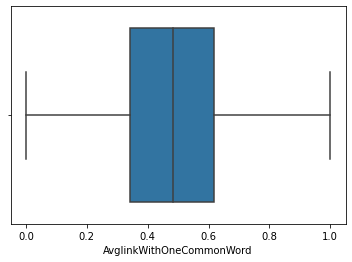

In [28]:
sns.boxplot(x=train_data["AvglinkWithOneCommonWord"])

/home/dhamodhar/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AvglinkWithTwoCommonWord'>

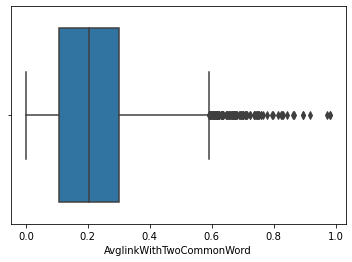

In [29]:
sns.boxplot(train_data['AvglinkWithTwoCommonWord'])

In [30]:
train_data['AvglinkWithTwoCommonWord'].mean() + 3*train_data['AvglinkWithTwoCommonWord'].std()

0.6562210032759818

In [31]:
train_data = train_data[(train_data['AvglinkWithTwoCommonWord']<0.654)]

<AxesSubplot:xlabel='AvglinkWithThreeCommonWord'>

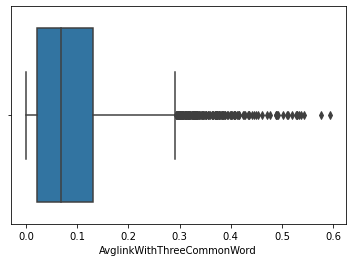

In [32]:
sns.boxplot(x = train_data['AvglinkWithThreeCommonWord'])

<AxesSubplot:xlabel='AvglinkWithFourCommonWord'>

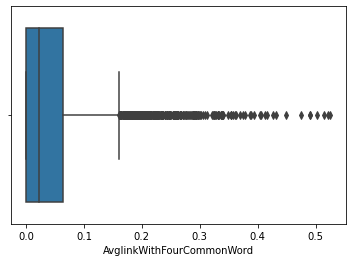

In [33]:
sns.boxplot(x = train_data['AvglinkWithFourCommonWord'])

<AxesSubplot:xlabel='avgLinkWordLength'>

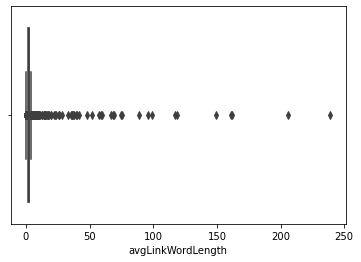

In [34]:
sns.boxplot(x = train_data['avgLinkWordLength'])

In [35]:
upper_lim = (train_data['avgLinkWordLength'].mean() + 3*train_data['avgLinkWordLength'].std())
lower_lim = (train_data['avgLinkWordLength'].mean() - 3*train_data['avgLinkWordLength'].std())
print((train_data['avgLinkWordLength']>upper_lim).sum())
print((train_data['avgLinkWordLength']<lower_lim).sum())
train_data = train_data[(train_data['avgLinkWordLength']<upper_lim)]

34
0


<AxesSubplot:xlabel='alchemy_category_score'>

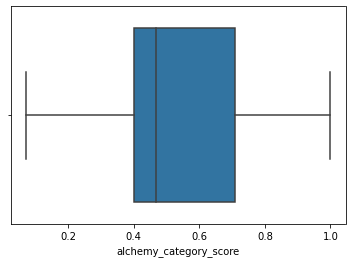

In [36]:
sns.boxplot(x = train_data['alchemy_category_score'])

<AxesSubplot:xlabel='frameTagRatio'>

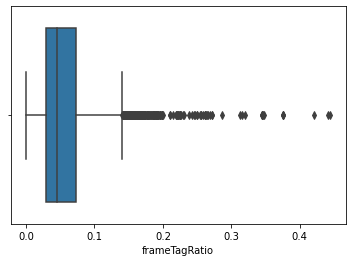

In [37]:
sns.boxplot(x = train_data['frameTagRatio'])

<AxesSubplot:xlabel='alphanumCharCount'>

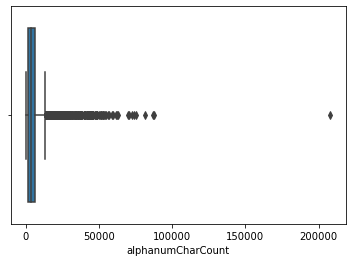

In [38]:
sns.boxplot(x = train_data['alphanumCharCount'])

In [39]:
upper_lim = (train_data['alphanumCharCount'].mean() + 3*train_data['alphanumCharCount'].std())
lower_lim = (train_data['alphanumCharCount'].mean() - 3*train_data['alphanumCharCount'].std())
print((train_data['alphanumCharCount']>upper_lim).sum())
print((train_data['alphanumCharCount']<lower_lim).sum())
train_data = train_data[(train_data['alphanumCharCount']<upper_lim)]

115
0


<AxesSubplot:xlabel='embedRatio'>

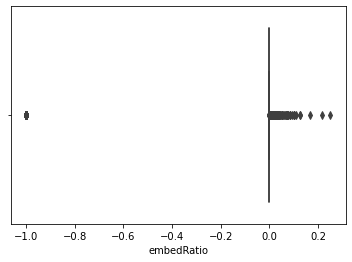

In [40]:
sns.boxplot(x = train_data['embedRatio'])

In [41]:
upper_lim = (train_data['embedRatio'].mean() + 3*train_data['embedRatio'].std())
lower_lim = (train_data['embedRatio'].mean() - 3*train_data['embedRatio'].std())
print((train_data['embedRatio']>upper_lim).sum())
print((train_data['embedRatio']<lower_lim).sum())
# train_data = train_data[(train_data['embedRatio']<upper_lim)]

0
0


<AxesSubplot:xlabel='tagRatio'>

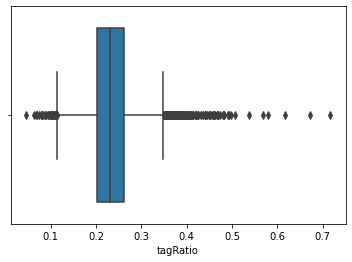

In [42]:
sns.boxplot(x = train_data['tagRatio'])

In [43]:
upper_lim = (train_data['tagRatio'].mean() + 3*train_data['tagRatio'].std())
lower_lim = (train_data['tagRatio'].mean() - 3*train_data['tagRatio'].std())
print((train_data['tagRatio']>upper_lim).sum())
print((train_data['tagRatio']<lower_lim).sum())
train_data = train_data[(train_data['tagRatio']<upper_lim)]

75
5


<AxesSubplot:xlabel='hyperlinkToAllWordsRatio'>

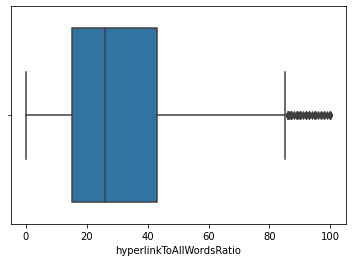

In [44]:
sns.boxplot(x = train_data['hyperlinkToAllWordsRatio'])

In [45]:
upper_lim = (train_data['hyperlinkToAllWordsRatio'].mean() + 3*train_data['hyperlinkToAllWordsRatio'].std())
lower_lim = (train_data['hyperlinkToAllWordsRatio'].mean() - 3*train_data['hyperlinkToAllWordsRatio'].std())
print((train_data['hyperlinkToAllWordsRatio']>upper_lim).sum())
print((train_data['hyperlinkToAllWordsRatio']<lower_lim).sum())
train_data = train_data[(train_data['hyperlinkToAllWordsRatio']<upper_lim)]

22
0


<AxesSubplot:xlabel='linksCount'>

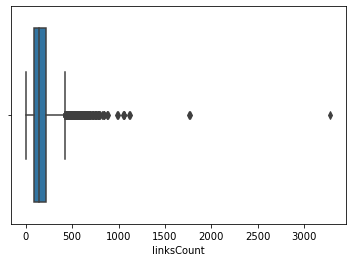

In [46]:
sns.boxplot(x = train_data['linksCount'])

In [47]:
upper_lim = (train_data['linksCount'].mean() + 3*train_data['linksCount'].std())
lower_lim = (train_data['linksCount'].mean() - 3*train_data['linksCount'].std())
print((train_data['linksCount']>upper_lim).sum())
print((train_data['linksCount']<lower_lim).sum())
train_data = train_data[(train_data['linksCount']<upper_lim)]

87
0


<AxesSubplot:xlabel='parametrizedLinkRatio'>

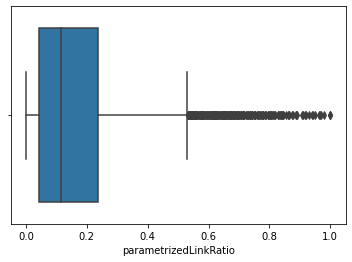

In [48]:
sns.boxplot(x = train_data['parametrizedLinkRatio'])

<AxesSubplot:xlabel='spellingErrorsRatio'>

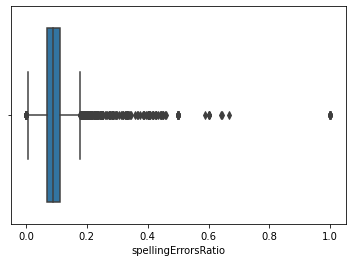

In [49]:
sns.boxplot(x = train_data['spellingErrorsRatio'])

In [50]:
upper_lim = (train_data['spellingErrorsRatio'].mean() + 3*train_data['spellingErrorsRatio'].std())
lower_lim = (train_data['spellingErrorsRatio'].mean() - 3*train_data['spellingErrorsRatio'].std())
print((train_data['spellingErrorsRatio']>upper_lim).sum())
print((train_data['spellingErrorsRatio']<lower_lim).sum())
train_data = train_data[(train_data['spellingErrorsRatio']<upper_lim)]

108
0


In [51]:
train_data.shape

(5412, 38)

### Removing skewness in few features 

In [52]:
from sklearn.preprocessing import power_transform

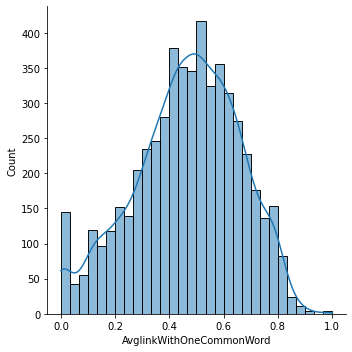

In [53]:
sns.displot(train_data['AvglinkWithOneCommonWord'],bins = 30,kde=True)

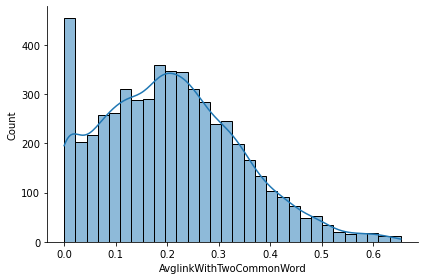

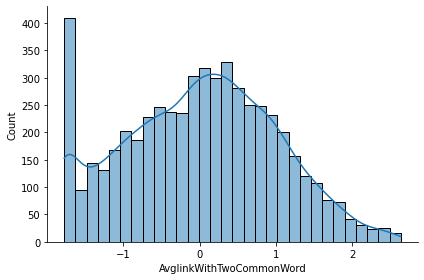

In [54]:
sns.displot(train_data['AvglinkWithTwoCommonWord'],bins = 30,kde=True,height=4, aspect=1.5)
train_data['AvglinkWithTwoCommonWord'] = power_transform(train_data[['AvglinkWithTwoCommonWord']],method='yeo-johnson')[:,0]
sns.displot(train_data['AvglinkWithTwoCommonWord'],kde=True,bins = 30,height=4, aspect=1.5)

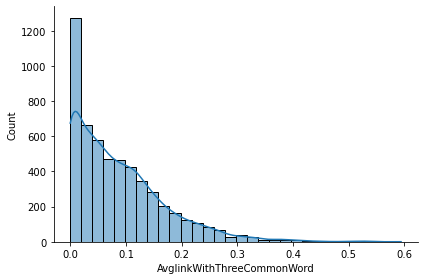

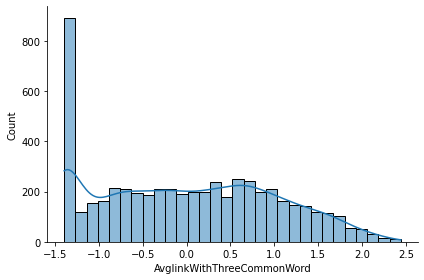

In [55]:
sns.displot(train_data['AvglinkWithThreeCommonWord'],bins = 30,kde=True,height=4, aspect=1.5)
train_data['AvglinkWithThreeCommonWord'] = power_transform(train_data[['AvglinkWithThreeCommonWord']],method='yeo-johnson')[:,0]
sns.displot(train_data['AvglinkWithThreeCommonWord'],kde=True,bins = 30,height=4, aspect=1.5)

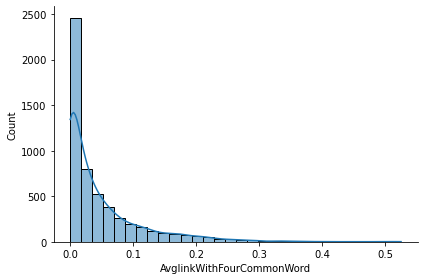

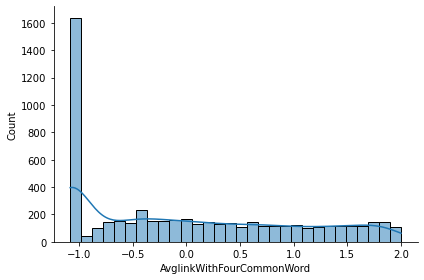

In [56]:
sns.displot(train_data['AvglinkWithFourCommonWord'],bins = 30,kde=True,height=4, aspect=1.5)
train_data['AvglinkWithFourCommonWord'] = power_transform(train_data[['AvglinkWithFourCommonWord']],method='yeo-johnson')[:,0]
sns.displot(train_data['AvglinkWithFourCommonWord'],kde=True,bins = 30,height=4, aspect=1.5)

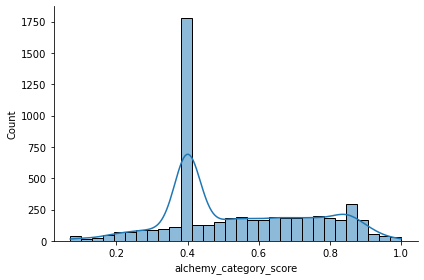

In [57]:
sns.displot(train_data['alchemy_category_score'],bins = 30,kde=True,height=4, aspect=1.5)

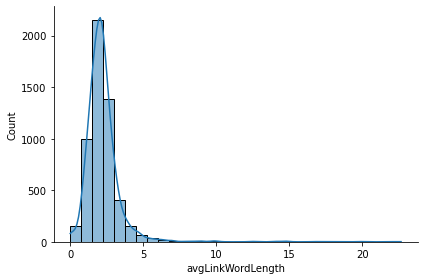

In [58]:
sns.displot(train_data['avgLinkWordLength'],bins = 30,kde=True,height=4, aspect=1.5)

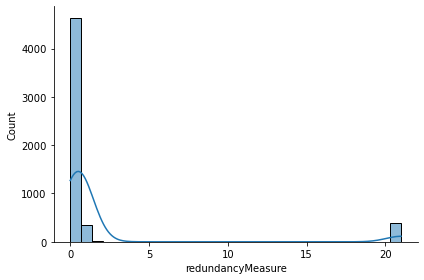

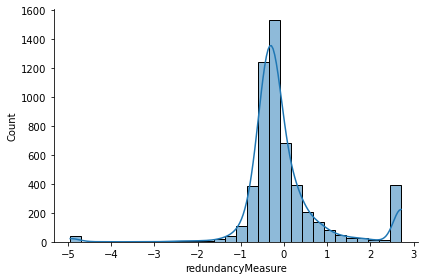

In [59]:
sns.displot(train_data['redundancyMeasure'],bins = 30,kde=True,height=4, aspect=1.5)
train_data['redundancyMeasure'] = power_transform(train_data[['redundancyMeasure']],method='yeo-johnson')[:,0]
sns.displot(train_data['redundancyMeasure'],kde=True,bins = 30,height=4, aspect=1.5)

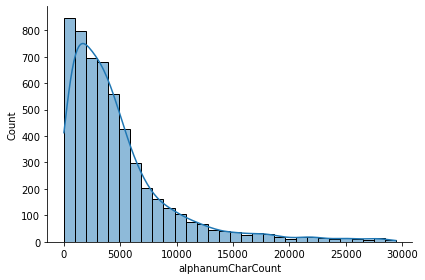

In [60]:
sns.displot(train_data['alphanumCharCount'],kde=True,bins = 30,height=4, aspect=1.5)

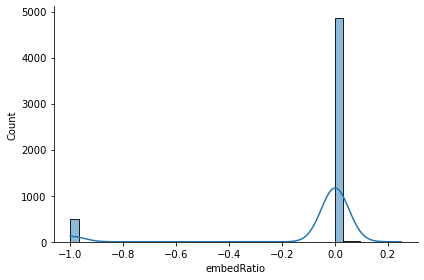

In [61]:
sns.displot(train_data['embedRatio'],kde=True,bins = 40,height = 4, aspect=1.5)

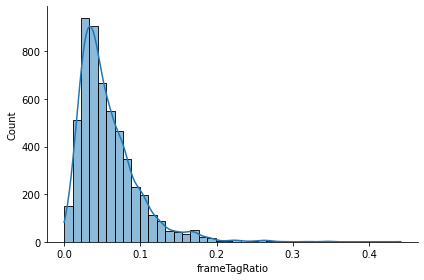

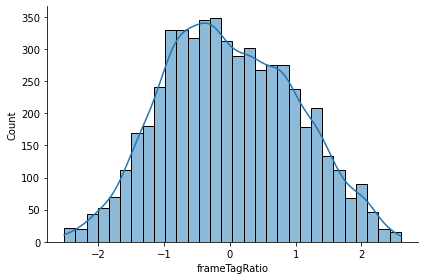

In [62]:
sns.displot(train_data['frameTagRatio'],kde=True,bins = 40,height = 4, aspect=1.5)
train_data['frameTagRatio'] = power_transform(train_data[['frameTagRatio']],method='yeo-johnson')[:,0]
sns.displot(train_data['frameTagRatio'],kde=True,bins = 30,height=4, aspect=1.5)

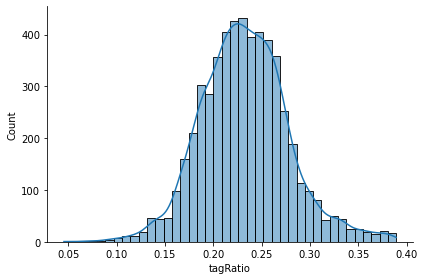

In [63]:
sns.displot(train_data['tagRatio'],kde=True,bins = 40,height = 4, aspect=1.5)

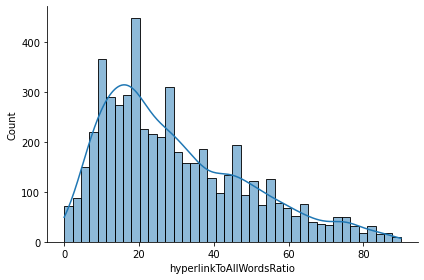

In [64]:
sns.displot(train_data['hyperlinkToAllWordsRatio'],kde=True,bins = 40,height = 4, aspect=1.5)

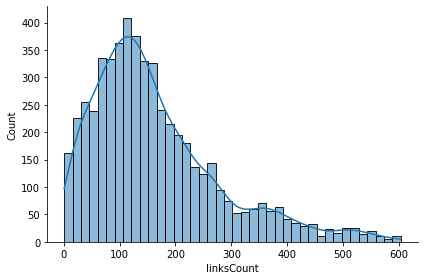

In [65]:
sns.displot(train_data['linksCount'],kde=True,bins = 40,height = 4, aspect=1.5)

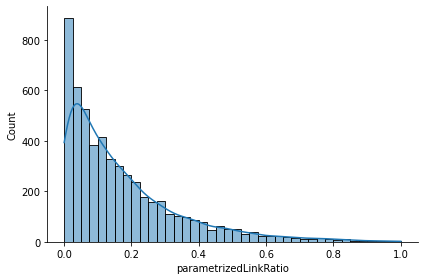

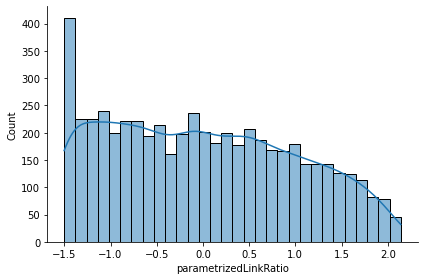

In [66]:
sns.displot(train_data['parametrizedLinkRatio'],kde=True,bins = 40,height = 4, aspect=1.5)
train_data['parametrizedLinkRatio'] = power_transform(train_data[['parametrizedLinkRatio']],method='yeo-johnson')[:,0]
sns.displot(train_data['parametrizedLinkRatio'],kde=True,bins = 30,height=4, aspect=1.5)

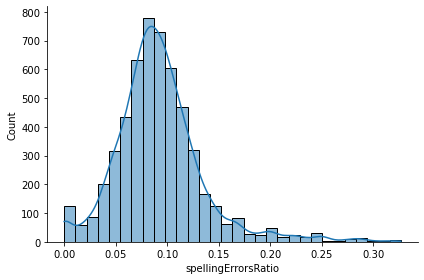

In [67]:
sns.displot(train_data['spellingErrorsRatio'],kde=True,bins = 30,height = 4, aspect=1.5)

### Normalization of the Numerical Data

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numer_train_data = train_data.drop(['url','body','title','label'],axis = 1)
numer_test_data = test_data.drop(['url','body','title'],axis = 1)

numer_train_data = scaler.fit_transform(numer_train_data)
numer_test_data = scaler.transform(numer_test_data)

# NLP

In [69]:
import nltk
import string
import re

### Remove punctuation, convert the characters to lowercase and seperate alphanumeric words

### Remove Stopwords

In [70]:
def punc_helper(ch):
    if(ch not in string.punctuation):
        return ch.lower()
    else:
        return ' '

def remove_punc_and_lower(s):
    without_punc = "".join([punc_helper(ch) for ch in s])
    return without_punc

def seperate_alphanum(s):
    return re.findall(r"[^\W\d_]+|\d+", s)

stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokens):
    txt = [word for word in tokens if word not in stopwords]
    return txt

In [71]:
############ Basic Lemmatization with nltk ############
# wn = nltk.WordNetLemmatizer()

# def lemmatization(txt): (Basic)
#     lemmatized_txt = [wn.lemmatize(word) for word in txt]
#     return lemmatized_txt

############ Stemming ########### (Not efficient)
# ps = nltk.PorterStemmer()

# def stemmer(txt):
#     lemmatized_txt = [ps.stem(word) for word in txt]
#     return lemmatized_txt


############# Lemmetization using Spacy library ############## (Taking a lot of time to execute)
# import spacy
# def spacy_lemmetizer(s):
#     s = " ".join(s) 
#     nlp = spacy.load('en_core_web_sm')
#     doc = nlp(s)
#     tokens = []
    
#     for token in doc:
#         tokens.append(token)
    
#     lemmatized_sentence = " ".join([token.lemma_ for token in doc])
#     return lemmatized_sentence

### Lemmatizing each parts of speech with its own lemmatizer

In [72]:
from nltk.corpus import wordnet
 
lemmatizer = nltk.WordNetLemmatizer()
 
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

def word_net_lemmatizer(sentence):
    sentence = " ".join(sentence)
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence)) 
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    lemmatized_sentence = []
    
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:       
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    lemmatized_sentence = " ".join(lemmatized_sentence)
    
    return lemmatized_sentence

In [73]:
# Helper function to use all the preprocessing techniques at once.
def preprocess_text(train_data,feature):
    
    new_feature = train_data[feature].apply(lambda x : remove_punc_and_lower(x))
    
    new_feature = new_feature.apply(lambda x : seperate_alphanum(x))
    
    new_feature = new_feature.apply(lambda x : remove_stopwords(x))

    new_feature = new_feature.apply(lambda x : word_net_lemmatizer(x))
    
    return new_feature

In [74]:
train_data['body_new'] = preprocess_text(train_data,'body')
test_data['body_new'] = preprocess_text(test_data,'body')

train_data['url_new'] = preprocess_text(train_data,'url')
test_data['url_new'] = preprocess_text(test_data,'url')

train_data['title_new'] = preprocess_text(train_data,'title')
test_data['title_new'] = preprocess_text(test_data,'title')

# train_data.to_csv('train_data_vectors.csv')
# test_data.to_csv('test_data_vectors.csv')

In [75]:

# train_data_new = pd.read_csv('train_data_vectors.csv')
# test_data_new = pd.read_csv('test_data_vectors.csv')

In [76]:
######## Bag of Words #######

# from sklearn.feature_extraction.text import CountVectorizer

# count_vect = CountVectorizer()

# # Ignore words that are in more than half of the documents.
# count_vect.set_params(max_df=0.5)

# # Ignore words that are not in atleast 2 documents.
# count_vect.set_params(min_df=2)

# X_counts = count_vect.fit_transform(data['body_new'])

### Using word_net_lemmatizer, no of features = 69786

### Using word_net_lemmatizer + RE for seperation of alphanum, no of features = 66736

### Using above 2 + setting min and max params, no of features = 27365

In [77]:
# Joining all the three text columns to fit in the tfidf vector
join_train = train_data['body_new']+' '+train_data['title_new']+' '+train_data['url_new']
join_test = test_data['body_new']+' '+test_data['title_new']+' '+test_data['url_new']

In [78]:
######## TFIDF vectorization #######
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Ignore words that are in more than half of the documents.
tfidf_vectorizer.set_params(max_df=0.5)

# Ignore words that are not in atleast 2 documents.
tfidf_vectorizer.set_params(min_df=2)

tfvec = tfidf_vectorizer.fit(pd.concat([join_train,join_test]))

train_vector_body = pd.DataFrame(tfvec.transform(train_data['body_new']).todense(),columns = tfvec.get_feature_names())
test_vector_body = pd.DataFrame(tfvec.transform(test_data['body_new']).todense(),columns = tfvec.get_feature_names())

# tfvec = tfidf_vectorizer.fit(pd.concat([train_data['title_new'],test_data['title_new']]))
train_vector_title = pd.DataFrame(tfvec.transform(train_data['title_new']).todense(),columns = tfvec.get_feature_names())
test_vector_title = pd.DataFrame(tfvec.transform(test_data['title_new']).todense(),columns = tfvec.get_feature_names())

# tfvec = tfidf_vectorizer.fit(pd.concat([train_data['url_new'],test_data['url_new']]))
train_vector_url = pd.DataFrame(tfvec.transform(train_data['url_new']).todense(),columns = tfvec.get_feature_names())
test_vector_url = pd.DataFrame(tfvec.transform(test_data['url_new']).todense(),columns = tfvec.get_feature_names())

### Decompose the 30000 features space dimension to lower dimensions

In [79]:
from sklearn.decomposition import PCA

### Decompose to 300 features each for body,title and url

In [80]:
pca = PCA(n_components=300)

train_pca1 = pca.fit_transform(train_vector_body)
test_pca1 = pca.transform(test_vector_body)

pca = PCA(n_components=300)
train_pca2 = pca.fit_transform(train_vector_title)
test_pca2 = pca.transform(test_vector_title)

pca = PCA(n_components=300)
train_pca3 = pca.fit_transform(train_vector_url)
test_pca3 = pca.transform(test_vector_url)

In [81]:
train_data_pca = np.concatenate((np.concatenate((train_pca1,train_pca2),axis=1),train_pca3),axis=1)
test_data_pca = np.concatenate((np.concatenate((test_pca1,test_pca2),axis=1),test_pca3),axis=1)

In [82]:
# Concatenating the numerical data.
train_data_pca = np.concatenate((train_data_pca ,numer_train_data),axis = 1)
test_data_pca = np.concatenate((test_data_pca ,numer_test_data),axis = 1)

In [83]:
train_data_pca = pd.DataFrame(train_data_pca)
test_data_pca = pd.DataFrame(test_data_pca)

### Importing Logistic Regression from SKlearn

In [84]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)

### Helper function for cross-validation

In [85]:
from sklearn.model_selection import KFold # import KFold
from sklearn.metrics import roc_auc_score

def cross_validator1(model,X1,train_data):
    kf = KFold(n_splits=5, random_state=22, shuffle=True) # Define the split - into 5 folds 
    kf.get_n_splits(X1) # returns the number of splitting iterations in the cross-validator

    pred = []
    proba= []
    acc = []
    roc = []
    
    for ndxs in kf.split(X1):
        model.fit(X1.iloc[ndxs[0]],train_data.iloc[ndxs[0]]['label'])
        pred.append(model.predict(X1.iloc[ndxs[1]]))
        acc.append(np.mean(pred[len(pred)-1] == train_data.iloc[ndxs[1]]['label']))
        proba.append(model.predict_proba(X1.iloc[ndxs[1]]))
        roc.append(roc_auc_score(train_data.iloc[ndxs[1]]['label'],proba[-1][:,1]))
    
    return pred,acc,roc

def cross_validator2(model,X1,train_data):
    kf = KFold(n_splits=5, random_state=22, shuffle=True) # Define the split - into 5 folds 
    kf.get_n_splits(X1) # returns the number of splitting iterations in the cross-validator

    pred = []
    proba= []
    acc = []
    roc = []
    
    for ndxs in kf.split(X1):
        model.fit(X1.iloc[ndxs[0]],train_data.iloc[ndxs[0]]['label'])
        pred.append(model.predict(X1.iloc[ndxs[1]]))
        acc.append(np.mean(pred[len(pred)-1] == train_data.iloc[ndxs[1]]['label']))
        proba.append(model.decision_function(X1.iloc[ndxs[1]]))
        roc.append(roc_auc_score(train_data.iloc[ndxs[1]]['label'],proba[-1]))
    
    return pred,acc,roc

def cross_validator3(model,X1,train_data):
    kf = KFold(n_splits=5, random_state=22, shuffle=True) # Define the split - into 5 folds 
    kf.get_n_splits(X1) # returns the number of splitting iterations in the cross-validator

    pred = []
    proba= []
    acc = []
    roc = []
    
    for ndxs in kf.split(X1):
        model.fit(X1[:,ndxs[0]],train_data[ndxs[0]]['label'])
        pred.append(model.predict(X1[:,ndxs[1]]))
        acc.append(np.mean(pred[len(pred)-1] == train_data.iloc[ndxs[1]]['label']))
        proba.append(model.predict_proba(X1[:,ndxs[1]]))
        roc.append(roc_auc_score(train_data.iloc[ndxs[1]]['label'],proba[-1][:,1]))
    
    return pred,acc,roc

### Best Public Leaderboard Score

#### Logistic Regression Along with PCA (Hyper Parameter Tuning with GridSearch)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(max_iter = 10000)

space = {}
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [0.1,0.5,1]

#define search
grid = GridSearchCV(lr, space)
grid.fit(train_data_pca,train_data['label'])

/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/dhamodhar/anaconda3/lib/python3.8/site-packages/s

/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/dhamodh

/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/dhamodhar/anaconda3/lib/python3.8/site-packages/s

/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/dhamodh

/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation

/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/dhamodh

/home/dhamodhar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.75073809 0.74999872        nan        nan        nan 0.78788332
 0.77882653 0.77882653 0.77864152        nan        nan        nan
 0.75073809 0.74999872        nan        nan        nan 0.80432665
 0.80635856 0.80635856 0.80635856        nan        nan        nan
 0.75073809 0.74999872        nan        nan        nan 0.80635822
 0.80783645 0.80783645 0.80783645        nan        nan        nan]
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.5, 1],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [87]:
grid.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [88]:
grid.best_score_

0.807836450743553

In [ ]:
test_id = pd.read_csv('test_data.csv')
out = pd.DataFrame()
out['id'] = test_id['id']
out['label']= proba[:,1]
out.to_csv('sub31.csv',index=False)

#### Kaggle Public Score : 0.88352
#### Kaggle Private Score : 0.86791

### Best Private Leaderboard Score

#### SVM with Word2Vec vectorizer and Linear Kernal

In [89]:
def sentense_to_vec(sentence, embeddings, dim=300):
    vec = np.zeros((dim,), dtype=np.float32)
    count = 0
    for w in sentence.split():
        if w == " ":
            continue
        if w in embeddings:
            count += 1
            vec += embeddings[w]
    if count == 0:
        return vec
    return vec/count

In [90]:
# import gensim

# encodings = gensim.models.KeyedVectors.load_word2vec_format('../../../../Downloads/GoogleNews-vectors-negative300.bin', binary=True)

In [91]:
# X1_body = train_data['body_new'].apply(lambda x : sentense_to_vec(x,encodings))
# X2_body = test_data['body_new'].apply(lambda x : sentense_to_vec(x,encodings))

# X1_url = train_data['url_new'].apply(lambda x : sentense_to_vec(x,encodings))
# X2_url = test_data['url_new'].apply(lambda x : sentense_to_vec(x,encodings))

# X1_title = train_data['title_new'].apply(lambda x : sentense_to_vec(x,encodings))
# X2_title = test_data['title_new'].apply(lambda x : sentense_to_vec(x,encodings))

In [119]:
# X1_body = pd.DataFrame.from_dict(dict(zip(X1_body.index, X1_body.values))).T
# X1_url = pd.DataFrame.from_dict(dict(zip(X1_url.index, X1_url.values))).T
# X1_title = pd.DataFrame.from_dict(dict(zip(X1_title.index, X1_title.values))).T
# X1_url= X1_url.add_suffix("url")

# X2_body = pd.DataFrame.from_dict(dict(zip(X2_body.index, X2_body.values))).T
# X2_url = pd.DataFrame.from_dict(dict(zip(X2_url.index, X2_url.values))).T
# X2_title = pd.DataFrame.from_dict(dict(zip(X2_title.index, X2_title.values))).T
# X2_url= X2_url.add_suffix("url")

# numer_train_data = pd.DataFrame(numer_train_data)
# numer_train_data = numer_train_data.add_suffix("_numer")

# numer_test_data = pd.DataFrame(numer_test_data)
# numer_test_data = numer_test_data.add_suffix("_numer")

# word2vec_train = X1_body.join( X1_title, lsuffix="_title")
# word2vec_train = word2vec_train.join(X1_url,lsuffix="_url")

# word2vec_test = X2_body.join( X2_title, lsuffix="_title")
# word2vec_test = word2vec_test.join(X2_url,lsuffix="_url")

In [121]:
# word2vec_train.to_csv('word2vec_train.csv')
# word2vec_test.to_csv('word2vec_test.csv')

In [122]:
word2vec_train = pd.read_csv('word2vec_train.csv')
word2vec_test = pd.read_csv('word2vec_test.csv')

In [123]:
from sklearn import svm
svc = svm.SVC(kernel = 'linear', C = 1) # Linear Kernel

pred,acc,roc  = cross_validator2(svc,word2vec_train,train_data)
print("Accuracy :", acc)
print("Roc Auc Scores :", roc)

Accuracy : [0.8116343490304709, 0.7922437673130194, 0.7791127541589649, 0.7744916820702403, 0.7726432532347505]
Roc Auc Scores : [0.8818580808977108, 0.8469735342102928, 0.836767986949116, 0.8339028875713659, 0.8260552904517986]


#### Kaggle Public Score : 0.86969
#### Kaggle Private Score : 0.89194